In [1]:
from a2_utils import *
from UZ_utils import *
import numpy as np
import cv2
from matplotlib import pyplot as plt
import os
from copy import deepcopy


# Exercise 1: Convolution

### (a) Compute the convolution between the signal and kernel below $ (k \star f) $ by hand

$$
f = \begin{bmatrix} 0, 1, 1, 1, 0, 0.7, 0.5, 0.2, 0, 0, 1, 0 \end{bmatrix}
$$

$$
k = \begin{bmatrix} 0.5, 1, 0.3 \end{bmatrix}
$$

**Answer:**
$$
\begin{aligned}
(k \star f)(0) = \sum_{j=0}^{2} k(j) \cdot f(0 - j) = k(0) \cdot f(0) + k(1) \cdot f(-1) + k(2) \cdot f(-2) = 0.5 \cdot 0 = 0\\

(k \star f)(1) = k(0) \cdot f(1) + k(1) \cdot f(0) + k(2) \cdot f(-1) = 0.5 \cdot 1 + 1 \cdot 0 = 0.5\\

(k \star f)(2) = k(0) \cdot f(2) + k(1) \cdot f(1) + k(2) \cdot f(0) = 0.5 \cdot 1 + 1 \cdot 1 + 0.3 \cdot 0 = 1.5\\

(k \star f)(3) = k(0) \cdot f(3) + k(1) \cdot f(2) + k(2) \cdot f(1) = 0.5 \cdot 1 + 1 \cdot 1 + 0.3 \cdot 1 = 1.8\\

(k \star f)(4) = k(0) \cdot f(4) + k(1) \cdot f(3) + k(2) \cdot f(2) = 0.5 \cdot 0 + 1 \cdot 1 + 0.3 \cdot 1 = 1.3\\

(k \star f)(5) = k(0) \cdot f(5) + k(1) \cdot f(4) + k(2) \cdot f(3) = 0.5 \cdot 0.7 + 1 \cdot 0 + 0.3 \cdot 1 = 0.65\\

(k \star f)(6) = k(0) \cdot f(6) + k(1) \cdot f(5) + k(2) \cdot f(4) = 0.5 \cdot 0.5 + 1 \cdot 0.7 + 0.3 \cdot 0 = 0.95\\

(k \star f)(7) = k(0) \cdot f(7) + k(1) \cdot f(6) + k(2) \cdot f(5) = 0.5 \cdot 0.2 + 1 \cdot 0.5 + 0.3 \cdot 0.7 = 0.81\\

(k \star f)(8) = k(0) \cdot f(8) + k(1) \cdot f(7) + k(2) \cdot f(6) = 0.5 \cdot 0 + 1 \cdot 0.2 + 0.3 \cdot 0.5 = 0.35\\

(k \star f)(9) = k(0) \cdot f(9) + k(1) \cdot f(8) + k(2) \cdot f(7) = 0.5 \cdot 0 + 1 \cdot 0 + 0.3 \cdot 0.2 = 0.06\\

(k \star f)(10) = k(0) \cdot f(10) + k(1) \cdot f(9) + k(2) \cdot f(8) = 0.5 \cdot 1 + 1 \cdot 0 + 0.3 \cdot 0 = 0.5\\

(k \star f)(11) = k(0) \cdot f(11) + k(1) \cdot f(10) + k(2) \cdot f(9) = 0.5 \cdot 0 + 1 \cdot 1 + 0.3 \cdot 0 = 1\\

(k \star f)(12) = k(0) \cdot f(12) + k(1) \cdot f(11) + k(2) \cdot f(10) = 1 \cdot 0 + 0.3 \cdot 1 = 0.3\\

(k \star f)(13) = k(0) \cdot f(13) + k(1) \cdot f(12) + k(2) \cdot f(11) = 0.3 \cdot 0 = 0
\end{aligned}
$$

Final result:
$$
k \star f = \begin{bmatrix} 0, 0.5, 1.5, 1.8, 1.3, 0.65, 0.95, 0.81, 0.35, 0.06, 0.5, 1, 0.3, 0 \end{bmatrix}
$$

### (b) Implement the function simple_convolution

In [2]:
def simple_convolution(signal, kernel):
    N = (len(kernel) - 1) // 2
    flip_kernel = np.flip(kernel)

    # slower version
    # tmp = np.zeros_like(signal)
    # for i in range(N, len(signal) - N):
    #     tmp[i] = np.sum(signal[i - N : i + N + 1] * flip_kernel)

    # Faster verion
    # idea is to create a matrix of offseted signal
    signal_windows = np.lib.stride_tricks.sliding_window_view(signal, len(kernel))
    
    result = np.sum(signal_windows * flip_kernel, axis=1)

    tmp = np.zeros_like(signal)
    tmp[N:len(signal) - N] = result

    return tmp

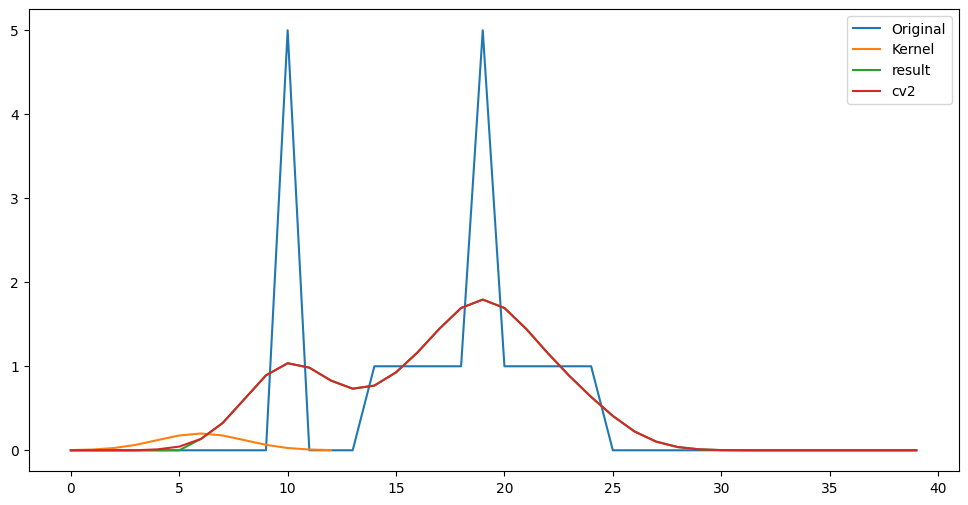

In [3]:
signal = read_data('signal.txt')
kernel = read_data('kernel.txt')

simple_convoluted = simple_convolution(signal, kernel)
cv2_convoluted = cv2.filter2D(src= signal, ddepth= -1, kernel= kernel)

plt.figure(figsize=(12, 6))
plt.plot(signal, label='Original')
plt.plot(kernel, label='Kernel')
plt.plot(simple_convoluted, label='result')
plt.plot(cv2_convoluted, label='cv2')
plt.legend()
plt.show()

### (c) Improve the function simple_convolution by also addressing the edges of the signal

In [4]:
# zero padding
def zero_pad_convolution(signal, kernel):
    N = (len(kernel) - 1) // 2
    flip_kernel = np.flip(kernel)
    padded_signal = np.concatenate((np.zeros(N), signal, np.zeros(N)))

    # slower version
    # tmp = np.zeros_like(padded_signal)
    # for i in range(N, len(padded_signal) - N):
    #     tmp[i] = np.sum(padded_signal[i - N : i + N + 1] * flip_kernel)

    # Faster verion
    # idea is to create a matrix of offseted signal
    signal_windows = np.lib.stride_tricks.sliding_window_view(padded_signal, len(kernel))
    
    return np.sum(signal_windows * flip_kernel, axis=1)


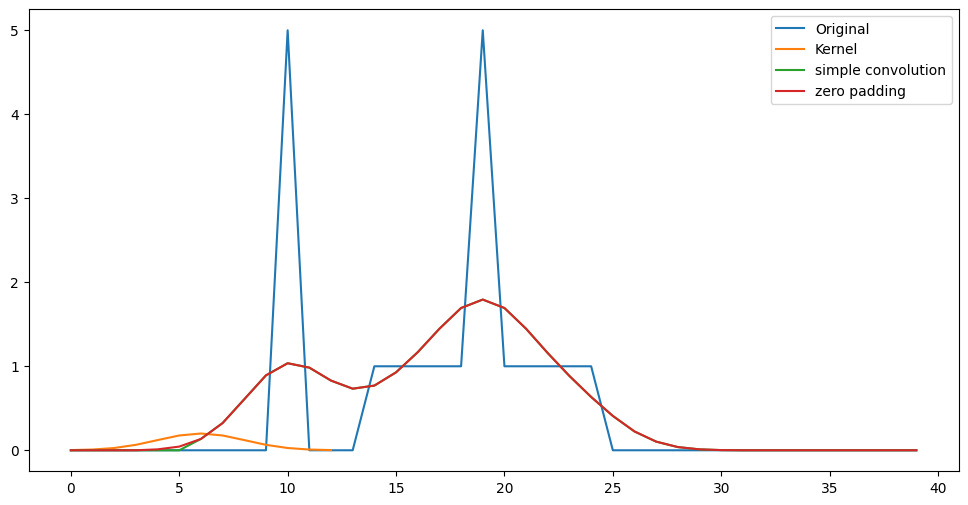

In [5]:
zero_pad_convoluted = zero_pad_convolution(signal, kernel)

plt.figure(figsize=(12, 6))
plt.plot(signal, label='Original')
plt.plot(kernel, label='Kernel')
plt.plot(simple_convoluted, label='simple convolution')
plt.plot(zero_pad_convoluted, label='zero padding')
plt.legend()
plt.show()

### (d) Write a function gauss(sigma) that calculates a Gaussian kernel
Use the definition:
$$
g(x) = \frac{1}{\sqrt{2 \pi}\sigma} \exp\left(-\frac{x^2}{2 \sigma^2}\right).
$$

In [6]:
def gauss(sigma):
    center = int(np.ceil(3.0 * sigma))
    x = np.arange(-center, center + 1)
    kernel = np.exp(-(x**2) / (2 * sigma**2)) / (np.sqrt(2 * np.pi) * sigma)
    kernel /= np.sum(kernel)
    return kernel

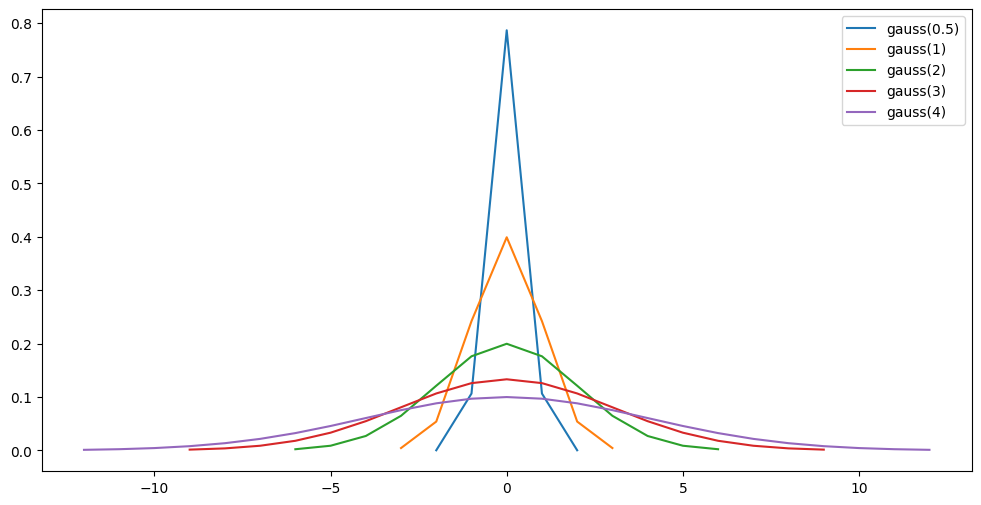

In [7]:
plt.figure(figsize=(12, 6))
sigmas = [0.5, 1, 2, 3, 4]
kernels = [gauss(sigma) for sigma in sigmas]
for sigma, kernel in zip(sigmas, kernels):
    center = int(np.ceil(3.0 * sigma))
    allign = np.arange(-center, center + 1)
    plt.plot(allign, kernel, label = f'gauss({sigma})')
plt.legend()
plt.show()

**Question:** The figure below shows two kernels (a) and (b) as well as signal (c).
Sketch (do not focus on exact proportions of your drawing, but rather on the understanding of what you are doing) the resulting convolved signal of the given input signal and each kernel.

**Answer:** In my notes. Generally, (a) smooths out the signal and (b) creates peak and dip when there is a change (angle for example)

### (e) Testing asociativity

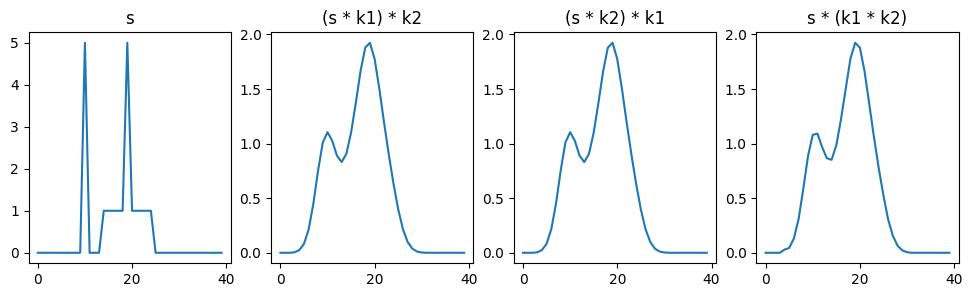

In [8]:
kernel1 = gauss(2)
kernel2 = np.array([0.1, 0.6, 0.4])

plt.figure(figsize=(12, 3))
plt.subplot(1, 4, 1)
plt.plot(signal)
plt.title("s")

plt.subplot(1, 4, 2)
#signal2 = simple_convolution(simple_convolution(signal, kernel1), kernel2)
signal2 = cv2.filter2D(src= cv2.filter2D(src= signal, ddepth= -1, kernel= kernel1), ddepth= -1, kernel= kernel2)
plt.plot(signal2)
plt.title("(s * k1) * k2")

plt.subplot(1, 4, 3)
#signal3 = simple_convolution(simple_convolution(signal, kernel2), kernel1)
signal3 = cv2.filter2D(src= cv2.filter2D(src= signal, ddepth= -1, kernel= kernel2), ddepth= -1, kernel= kernel1)
plt.plot(signal3)
plt.title("(s * k2) * k1")

plt.subplot(1, 4, 4)
#signal4 = simple_convolution(signal, simple_convolution(kernel1, kernel2))
signal4 = cv2.filter2D(src= signal, ddepth= -1, kernel= cv2.filter2D(src= kernel1, ddepth= -1, kernel= kernel2))
plt.plot(signal4)
plt.title("s * (k1 * k2)")

plt.show()

# Exercise 2: Image filtering

### (a) Write a function gaussfilter that generates a Gaussian filter and applies it to a 2-D image

In [9]:
def gaussfilter(I, sigma):
    '''
    I: image matrix
    sigma: Standard deviation for the Gaussian kernel.
    
    Returns:
    2-D numpy array representing the filtered image.
    '''
    kernel = gauss(sigma)
    kernel = kernel.reshape((1, -1))
    filtered = cv2.filter2D(I, -1, kernel)
    filtered2 = cv2.filter2D(filtered, -1, kernel.T)
    return filtered2

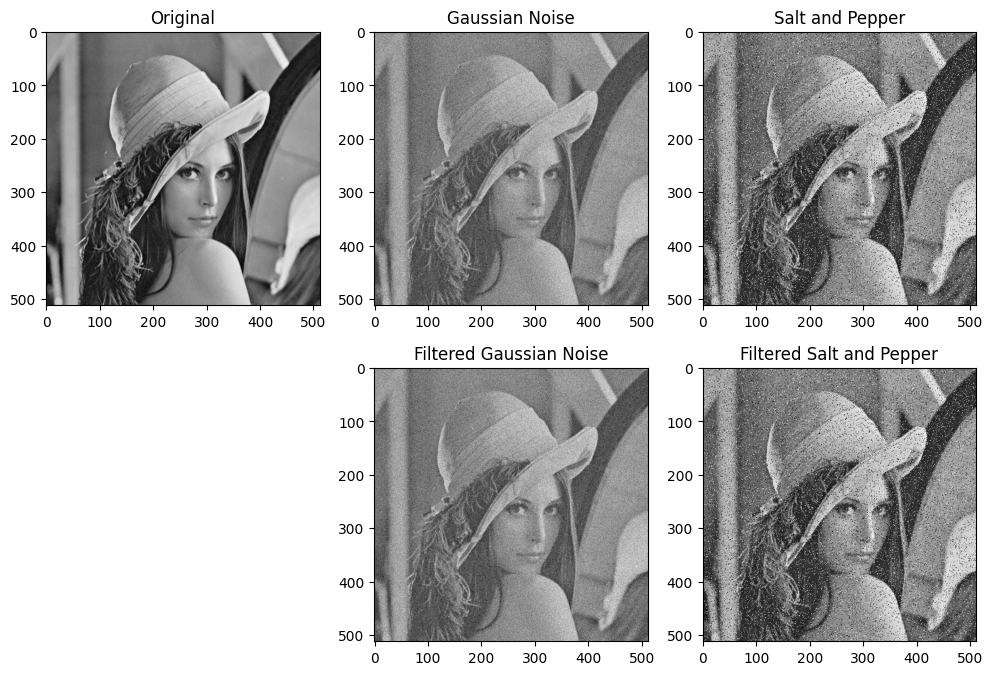

In [10]:
lena = imread_gray('images/lena.png')

plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.imshow(lena, 'gray')
plt.title('Original')

gaussy_image = gauss_noise(lena)
plt.subplot(2, 3, 2)
plt.imshow(gaussy_image, 'gray')
plt.title('Gaussian Noise')

salty_image = sp_noise(lena)
plt.subplot(2, 3, 3)
plt.imshow(salty_image, 'gray')
plt.title('Salt and Pepper')

sigma = 0.1
filtered_gaussy_image = gaussfilter(gaussy_image, sigma)
plt.subplot(2, 3, 5)
plt.imshow(filtered_gaussy_image, 'gray')
plt.title('Filtered Gaussian Noise')

filtered_salty_image = gaussfilter(salty_image, sigma)
plt.subplot(2, 3, 6)
plt.imshow(filtered_salty_image, 'gray')
plt.title('Filtered Salt and Pepper')

plt.show()

**Question:** Which noise is better removed using the Gaussian filter?

**Answer:** Gaussian filter

### (b) Implement use of convolution for image sharpening

In [11]:
def sharpen(image):
    matrix1 = np.array([[0, 0, 0], [0, 2, 0], [0, 0, 0]])
    matrix2 = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]])
    kernel = matrix1 - (1/9) * matrix2
    return cv2.filter2D(image, -1, kernel)

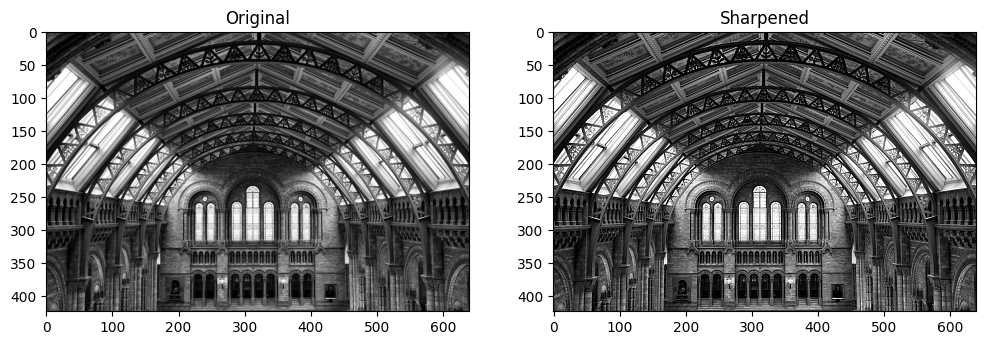

In [12]:
museum = imread_gray('images/museum.jpg')

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.imshow(museum, 'gray')
plt.title('Original')

sharpened = sharpen(museum)
plt.subplot(1, 2, 2)
plt.imshow(sharpened, 'gray', vmin=0, vmax=1)
plt.title('Sharpened')

plt.show()

### (c) Implement a nonlinear median filter.

In [13]:
def simple_median(signal, width):
    radius = width // 2
    # slower way
    # tmp = np.zeros_like(signal)

    # for i in range(radius, len(signal) - radius):
    #     tmp[i] = np.median(signal[i - radius : i + radius + 1])
    # return tmp

    # faster way
    # same idea as before, stacking to a matrix and seasrching for medium in each row

    signal_windows = np.lib.stride_tricks.sliding_window_view(signal, width)
    medians = np.median(signal_windows, axis=1)
    tmp = np.zeros_like(signal)
    tmp[radius:len(signal) - radius] = medians

    return tmp

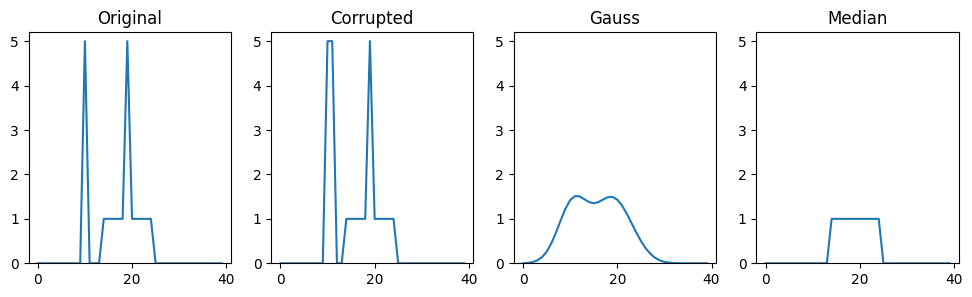

In [14]:
plt.figure(figsize=(12, 3))

signal = read_data('signal.txt')

plt.subplot(1, 4, 1)
plt.plot(signal)
plt.title("Original")
plt.ylim([np.min(signal), np.max(signal) + 0.2])

plt.subplot(1, 4, 2)
corrupted = signal.copy()
percent = 0.1
corrupted[np.random.rand(len(signal)) < percent / 2] = np.max(signal)
corrupted[np.random.rand(len(signal)) < percent / 2] = np.min(signal)
plt.plot(corrupted)
plt.title("Corrupted")
plt.ylim([np.min(signal), np.max(signal) + 0.2])

plt.subplot(1, 4, 3)
sigma = 3
gauss_filter = cv2.filter2D(corrupted, -1, gauss(sigma))
plt.plot(gauss_filter)
plt.title("Gauss")
plt.ylim([np.min(signal), np.max(signal) + 0.2])

plt.subplot(1, 4, 4)
median_filter = simple_median(signal, 5)
plt.plot(median_filter)
plt.title("Median")
plt.ylim([np.min(signal), np.max(signal) + 0.2])

plt.show()

### (d) Implement a 2-D version of the median filter

In [15]:
def median_filter_2d(image, width):
    tmp = np.zeros_like(image)
    radius = width // 2  # Using the same radius for both x and y

    # # Apply the median filter with a square window of size `width` x `width`
    # for x in range(radius, image.shape[0] - radius):
    #     for y in range(radius, image.shape[1] - radius):
    #         tmp[x, y] = np.median(image[x - radius : x + radius + 1, y - radius : y + radius + 1])

    # return tmp

    image_windows = np.lib.stride_tricks.sliding_window_view(image, (width, width))
    medians = np.median(image_windows, axis=(-2, -1))
    
    start_x = (image.shape[0] - medians.shape[0]) // 2
    start_y = (image.shape[1] - medians.shape[1]) // 2
    end_x = start_x + medians.shape[0]
    end_y = start_y + medians.shape[1]

    tmp[start_x:end_x, start_y:end_y] = medians

    return tmp

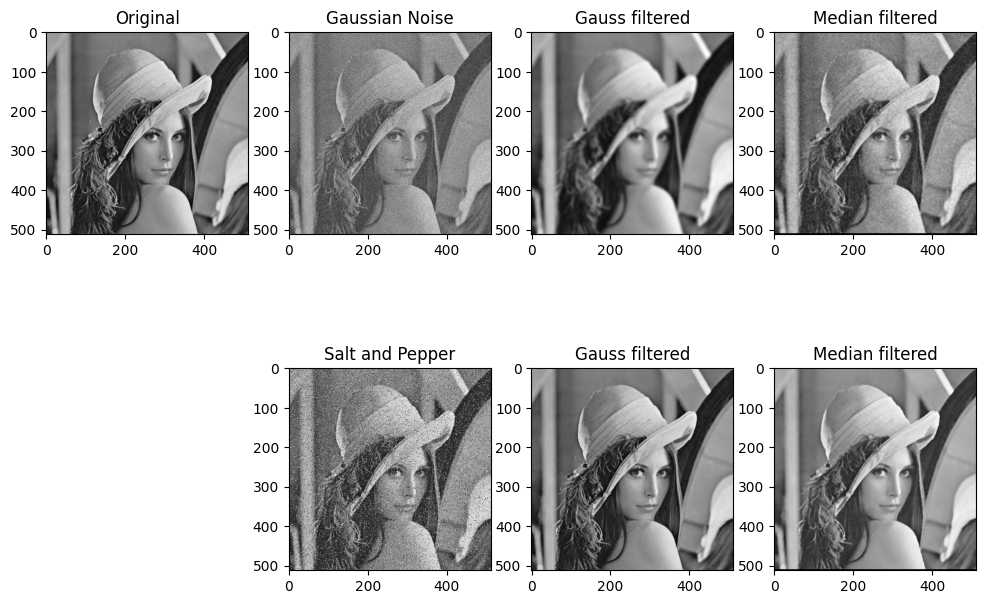

In [16]:
lena = imread_gray('images/lena.png')

plt.figure(figsize=(12, 8))

plt.subplot(2, 4, 1)
plt.imshow(lena, 'gray')
plt.title('Original')

gaussy_image = gauss_noise(lena)
plt.subplot(2, 4, 2)
plt.imshow(gaussy_image, 'gray')
plt.title('Gaussian Noise')

gauss_gaussy_image = gaussfilter(lena, sigma)
plt.subplot(2, 4, 3)
plt.imshow(gauss_gaussy_image, 'gray')
plt.title('Gauss filtered')

width=4
median_gaussy_image = median_filter_2d(gaussy_image, width)
plt.subplot(2, 4, 4)
plt.imshow(median_gaussy_image, 'gray')
plt.title('Median filtered')

salty_image = sp_noise(lena)
plt.subplot(2, 4, 6)
plt.imshow(salty_image, 'gray')
plt.title('Salt and Pepper')

sigma=0.2
gauss_salty_image = gaussfilter(lena, sigma)
plt.subplot(2, 4, 7)
plt.imshow(gauss_salty_image, 'gray')
plt.title('Gauss filtered')

median_salty_image = median_filter_2d(salty_image, width)
plt.subplot(2, 4, 8)
plt.imshow(median_salty_image, 'gray')
plt.title('Median filtered')

plt.show()

**Question:** What is the computational complexity of the Gaussian filter operation? How about the median filter? What does it depend on? Describe the computational complexity using the O notation (you can assume  nlog n complexity for sorting).

**Answer:**
- **Gaussian Filter**: $$ O(N \cdot k) $$ with separable filtering (has simple adition and multiplication)
- **Median Filter**: $$ O(N \cdot k^2 \log k) $$ (also has sorting to take care of)

N - total number of pixels; 
k - size of the filter window


In [17]:
def laplacian(image, sigma):
    return image - gaussfilter(image, sigma)

def hybrid(image1, image2, sigma_gauss, sigma_laplace, weight, type='weighted'):
    if type == 'regular':
        weight=0.5
    return weight * gaussfilter(image1, sigma_gauss) + (1 - weight) * laplacian(image2, sigma_laplace)

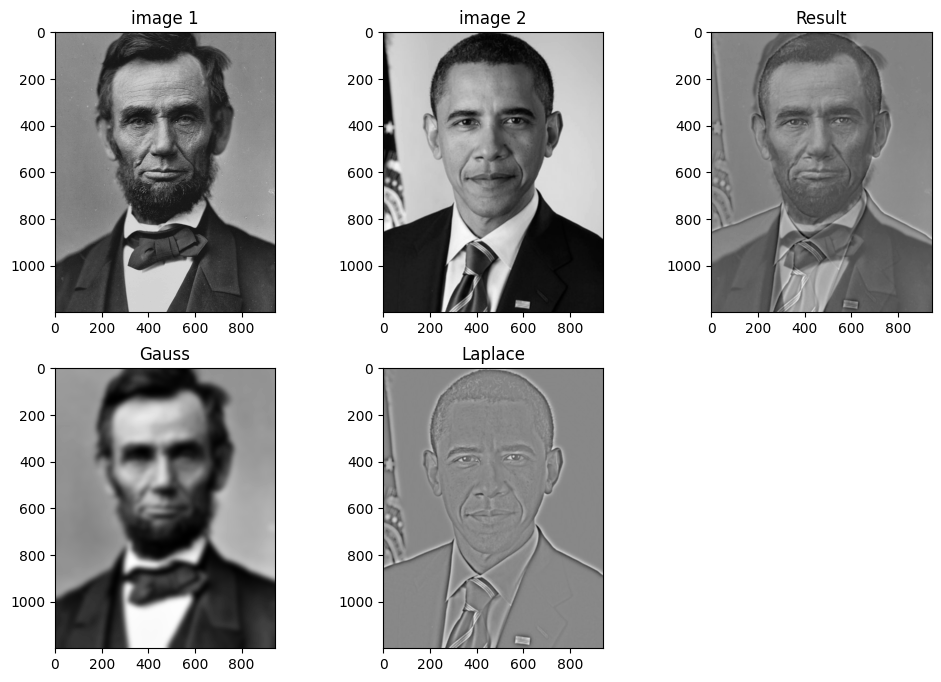

In [18]:
abe = imread_gray('images/lincoln.jpg')
osama = imread_gray('images/obama.jpg')

plt.figure(figsize=(12, 8))
plt.subplot(2, 3, 1)
plt.imshow(abe, 'gray')
plt.title('image 1')

plt.subplot(2, 3, 2)
plt.imshow(osama, 'gray')
plt.title('image 2')

plt.subplot(2, 3, 3)
plt.imshow(hybrid(abe, osama, 2, 8, 0.4), 'gray')
plt.title('Result')

plt.subplot(2, 3, 4)
plt.imshow(gaussfilter(abe, 10), 'gray')
plt.title('Gauss')

plt.subplot(2, 3, 5)
plt.imshow(laplacian(osama, 10), 'gray')
plt.title('Laplace')

plt.show()


# Exercise 3: Global approach to image description

### (a) Implement the function myhist3 that computes a 3-D histogram from a three channel image

In [19]:
def myhist3(I, n_bins = 256):
    color_image1D = np.reshape(I, (-1, 3))
    H = np.zeros((n_bins, n_bins, n_bins))

    # for pxR, pxG, pxB in color_image1D:
    #     H[min(int(pxR * n_bins), n_bins - 1)][min(int(pxG * n_bins), n_bins - 1)][min(int(pxB * n_bins), n_bins - 1)] += 1

    indices = np.minimum((color_image1D * n_bins).astype(int), n_bins - 1)
    np.add.at(H, (indices[:, 0], indices[:, 1], indices[:, 2]), 1)

    return H / np.sum(H)


### (b) Implement some distance measures

In [20]:
def euclidean(H1, H2):
    return np.sqrt(np.sum(np.square(H1 - H2)))

def chi_square(H1, H2, epsilon = 1e-10):
    return np.sum(np.square(H1 - H2) / (H1 + H2 + epsilon)) / 2

def intersection(H1, H2):
    return 1 - np.sum(np.minimum(H1, H2))

def hellinger(H1, H2):
    return np.sqrt(np.sum(np.square(np.sqrt(H1) - np.sqrt(H2))) / 2)

### (c) Test your function

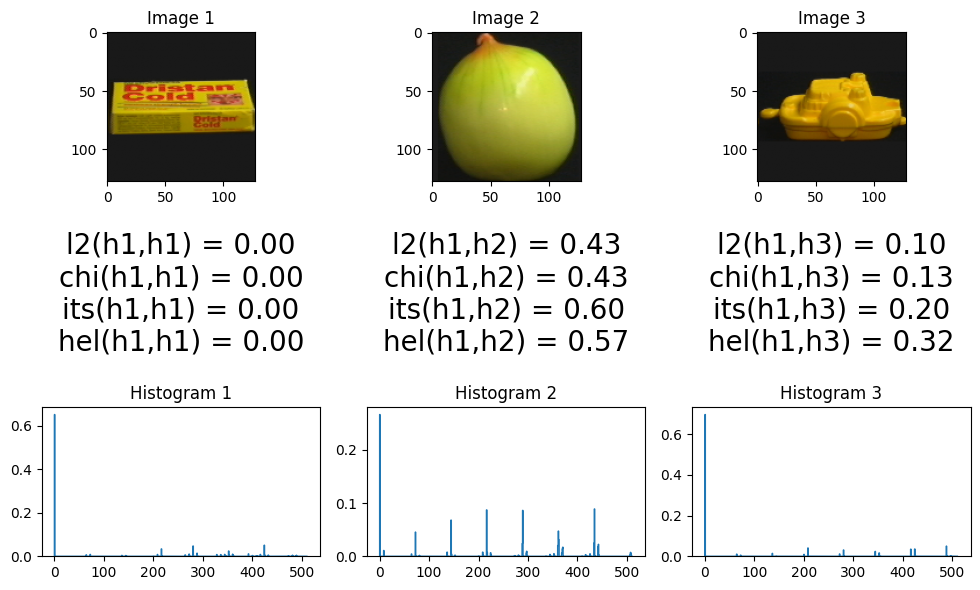

In [21]:
I1 = imread('dataset/object_01_1.png')
I2 = imread('dataset/object_02_1.png')
I3 = imread('dataset/object_03_1.png')

I1_H = myhist3(I1, 8).reshape(-1)
I2_H = myhist3(I2, 8).reshape(-1)
I3_H = myhist3(I3, 8).reshape(-1)

euc11 = euclidean(I1_H, I1_H)
euc12 = euclidean(I1_H, I2_H)
euc13 = euclidean(I1_H, I3_H)

chi11 = chi_square(I1_H, I1_H)
chi12 = chi_square(I1_H, I2_H)
chi13 = chi_square(I1_H, I3_H)

its11 = intersection(I1_H, I1_H)
its12 = intersection(I1_H, I2_H)
its13 = intersection(I1_H, I3_H)

hel11 = hellinger(I1_H, I1_H)
hel12 = hellinger(I1_H, I2_H)
hel13 = hellinger(I1_H, I3_H)


plt.figure(figsize=(10, 6))

plt.subplot(3, 3, 1)
plt.title('Image 1')
plt.imshow(I1)

plt.subplot(3, 3, 2)
plt.title('Image 2')
plt.imshow(I2)

plt.subplot(3, 3, 3)
plt.title('Image 3')
plt.imshow(I3)

plt.subplot(3, 3, 4)
plt.axis('off') 
plt.text(0.5, 0.5, f"l2(h1,h1) = {euc11:.2f}\nchi(h1,h1) = {chi11:.2f}\nits(h1,h1) = {its11:.2f}\nhel(h1,h1) = {hel11:.2f}",
         ha='center', va='center', fontsize=20)

plt.subplot(3, 3, 5)
plt.axis('off')
plt.text(0.5, 0.5, f"l2(h1,h2) = {euc12:.2f}\nchi(h1,h2) = {chi12:.2f}\nits(h1,h2) = {its12:.2f}\nhel(h1,h2) = {hel12:.2f}",
         ha='center', va='center', fontsize=20)

plt.subplot(3, 3, 6)
plt.axis('off')
plt.text(0.5, 0.5, f"l2(h1,h3) = {euc13:.2f}\nchi(h1,h3) = {chi13:.2f}\nits(h1,h3) = {its13:.2f}\nhel(h1,h3) = {hel13:.2f}",
         ha='center', va='center', fontsize=20)

plt.subplot(3, 3, 7)
plt.stairs(I1_H)
plt.title('Histogram 1')

plt.subplot(3, 3, 8)
plt.stairs(I2_H)
plt.title('Histogram 2')

plt.subplot(3, 3, 9)
plt.stairs(I3_H)
plt.title('Histogram 3')

plt.tight_layout()
plt.show()

**Question:** Which image (object_02_1.png or object_03_1.png) is more similar to image object_01_1.png considering the L2 distance? How about the other three distances? We can see that all three histograms contain a strongly expressed component (one bin has a much higher value than the others). Which color does this bin represent?

**Anwer:** All four metrics show that image 3 is the most similar to image 1.
That bin represents color black.


### (d) Implement a simple image retrieval system

In [22]:
def compute_histograms(directory, n_bins=8):
    histograms = []
    for filename in os.listdir(directory):
        img = imread(os.path.join(directory, filename))
        histograms.append((myhist3(img, n_bins), img, filename))
    return histograms

In [23]:
def display_similar(metric, ref_hist, dataset_hists, n_bins):
    hists_distance = [(hist, img, name, metric(hist, ref_hist), i) for i, (hist, img, name) in enumerate(dataset_hists)]
    hists_sorted = sorted(hists_distance, key=lambda a: a[3])
    fig = plt.figure(figsize=(20,5))
    for i, (H, img, name, distance, index) in enumerate(hists_sorted[:6]):
        ax = fig.add_subplot(2, 6, i+1, title=f"{name}: {distance:.3f}")
        ax.imshow(img)
        ax = fig.add_subplot(2, 6, 6+i+1)
        ax.bar(range(n_bins**3), H.transpose().flatten(), width=10)

    return hists_distance, hists_sorted

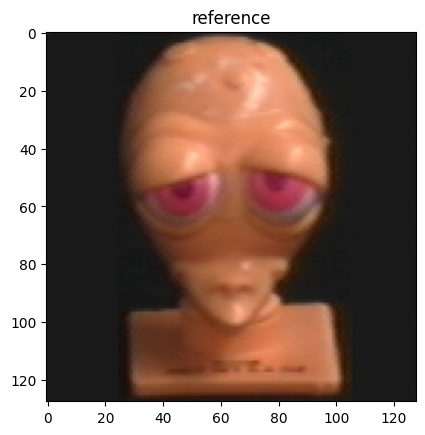

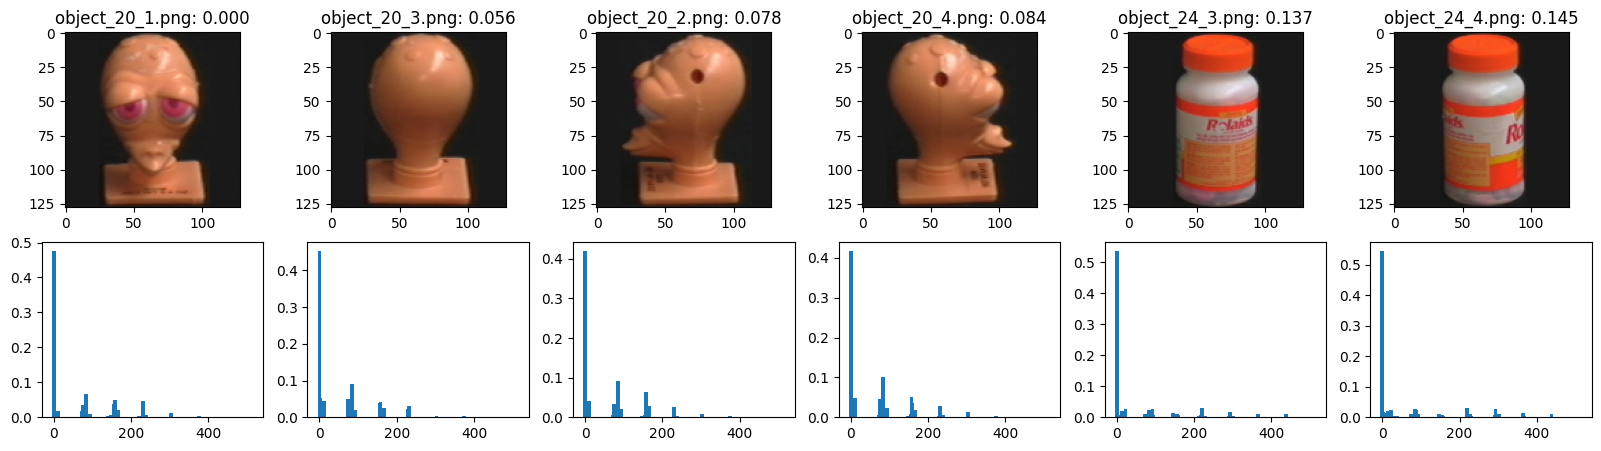

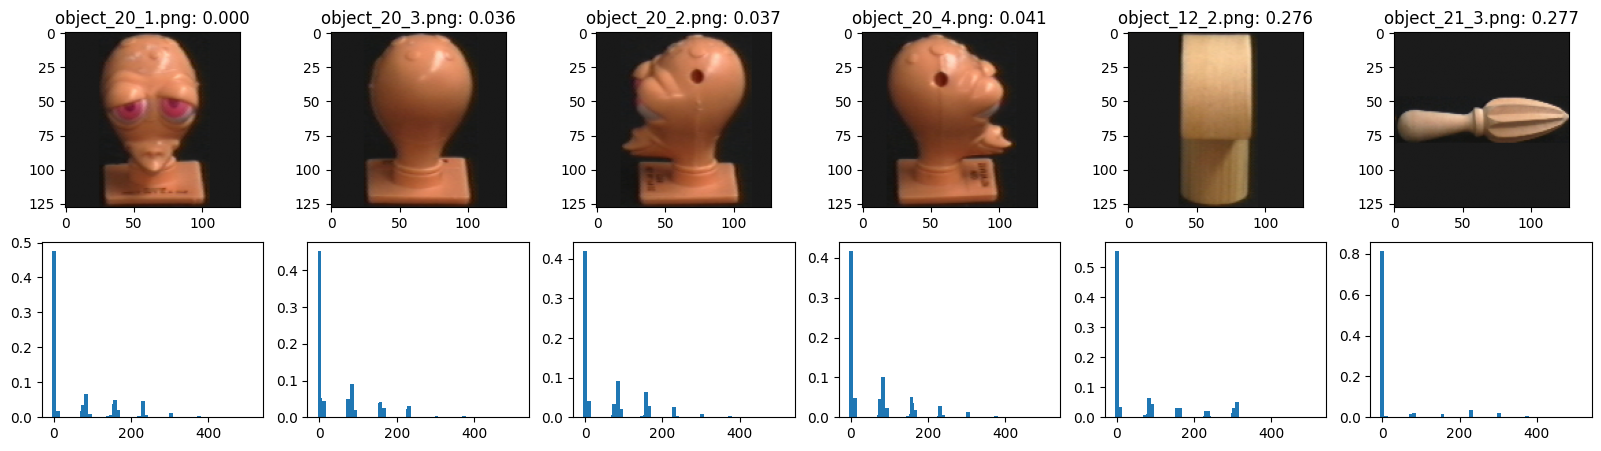

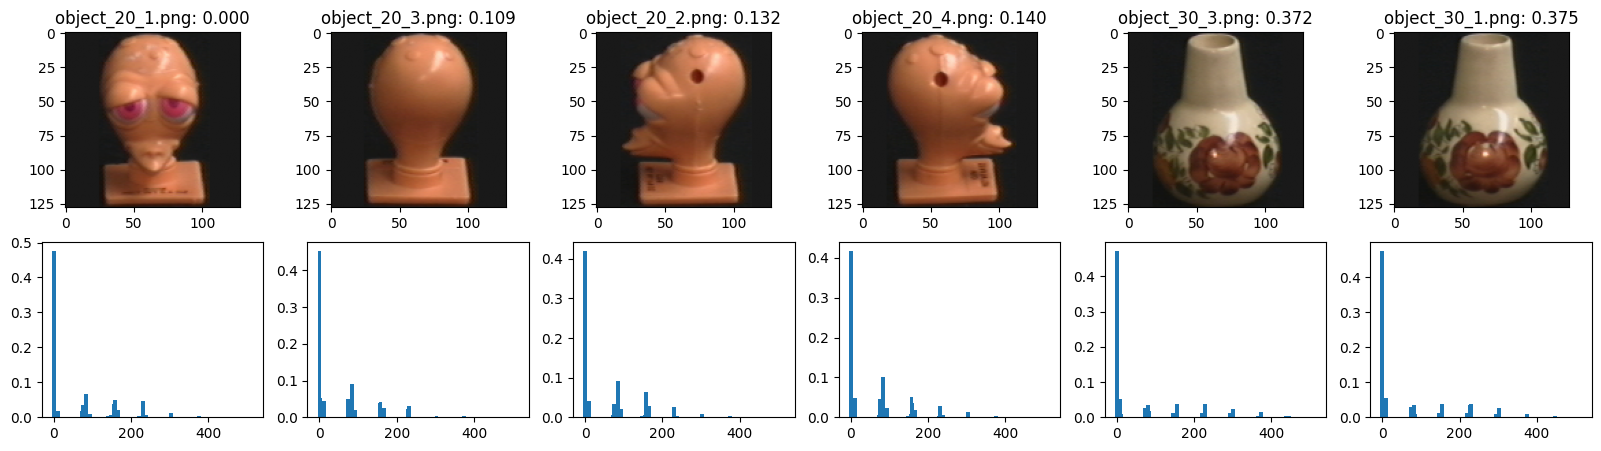

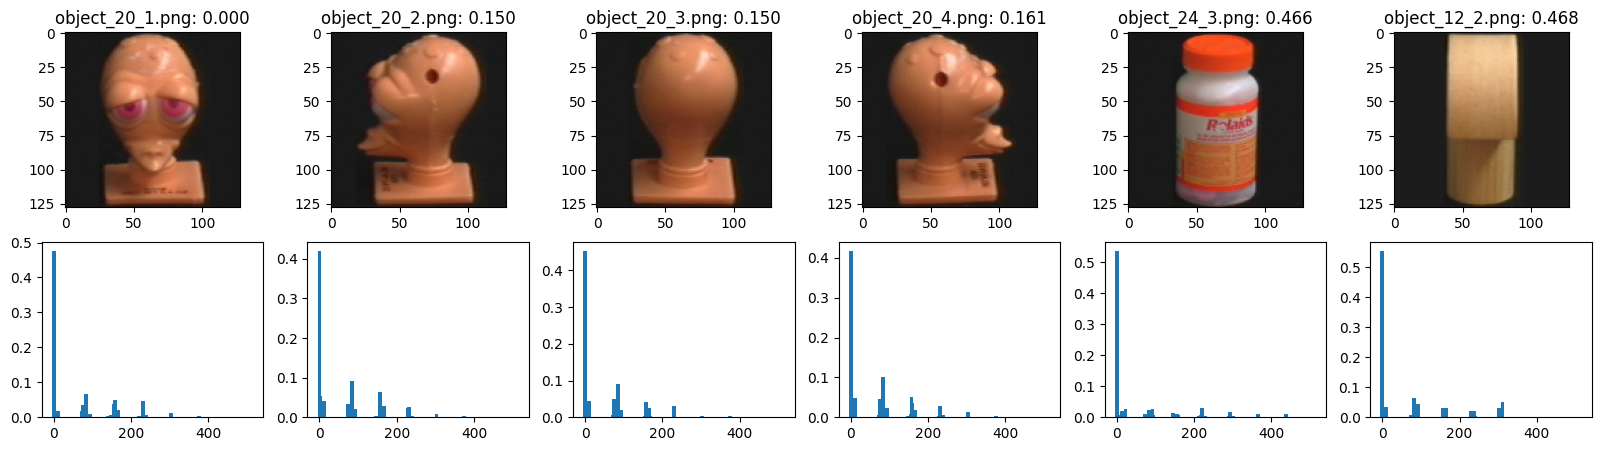

In [24]:
n_bins = 8
ref_img = imread('dataset/object_20_1.png')
ref_hist = myhist3(ref_img, n_bins)

dataset_hists = compute_histograms('dataset', n_bins)

imshow(ref_img, title="reference")

euc_dist, euc_sort_dist = display_similar(euclidean, ref_hist, dataset_hists, n_bins)
chi_dist, chi_sort_dist = display_similar(chi_square, ref_hist, dataset_hists, n_bins)
inte_dist, inte_sort_dist = display_similar(intersection, ref_hist, dataset_hists, n_bins)
hel_dist, hel_sort_dist = display_similar(hellinger, ref_hist, dataset_hists, n_bins)

**Question:** 
- Which distance is in your opinion best suited for image retrieval? 
- How does the retrieved sequence change if you use a different number of bins? 
- Is the execution time affected by the number of bins?

**Answer:** 
- In my opinion Hellinger distance is the most suited.
- The sequence does get more specific detail but also more noise.
- Yes, more bins to calculate, higher execution time

### (e) Plot distance values

In [25]:
def plot_distance(unsorted, sorted, name):
    fig = plt.figure(figsize=(10,5))
    ax = fig.add_subplot(1, 2, 1, title=f"unsorted {name}")
    ax.plot([d[3] for d in unsorted])
    ax.scatter([i for i, h in enumerate(unsorted) if h[4] in [h[4] for h in sorted[:6]]], [h[3] for i, h in enumerate(unsorted) if h[4] in [h[4] for h in sorted[:6]]], marker="o", c='r')

    ax = fig.add_subplot(1, 2, 2, title=f"sorted {name}")
    ax.plot([d[3] for d in sorted])
    ax.scatter(range(6), [d[3] for d in sorted[:6]], marker="o", c='r')

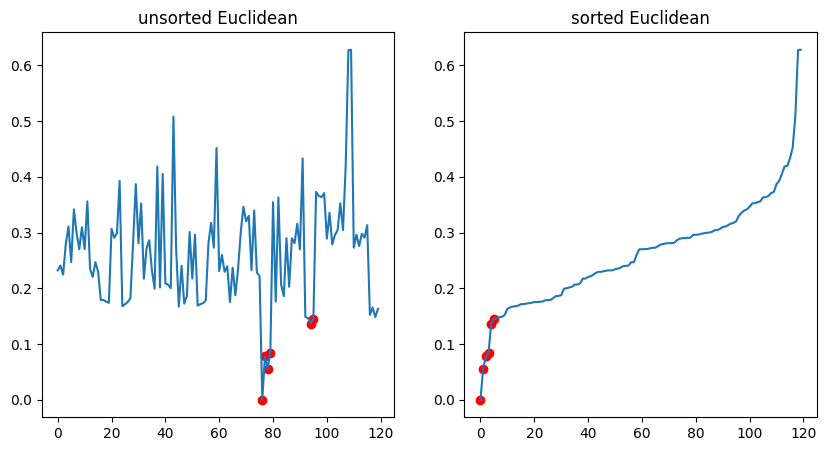

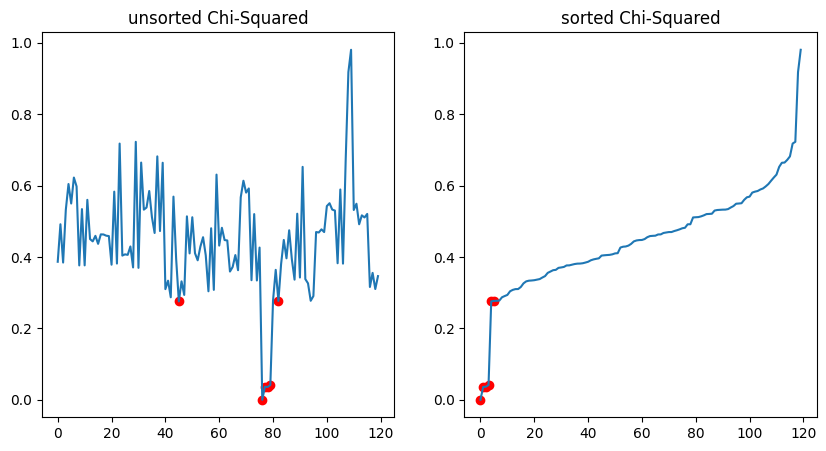

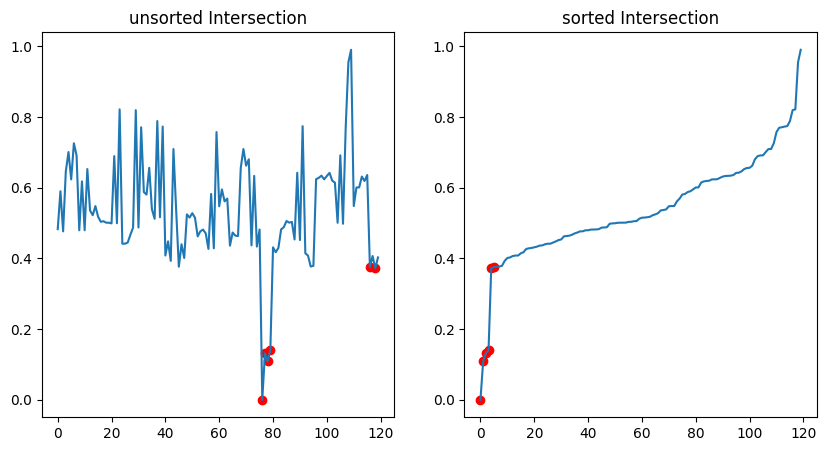

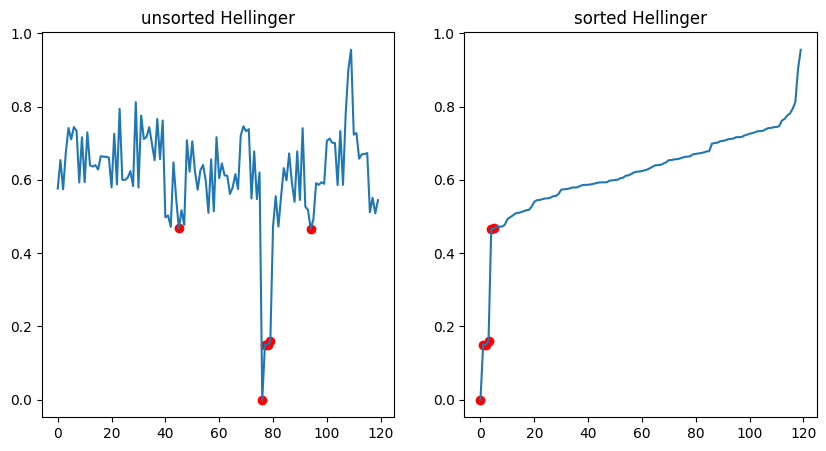

In [26]:
plot_distance(euc_dist, euc_sort_dist, "Euclidean")
plot_distance(chi_dist, chi_sort_dist, "Chi-Squared")
plot_distance(inte_dist, inte_sort_dist, "Intersection")
plot_distance(hel_dist, hel_sort_dist, "Hellinger")

### (f) Simple frequency-based weighting tehnique

**Question:** Which bins dominate this histogram?

**Answer:** Bins representing blacker colors

In [27]:
def compute_global_weights(histograms, lambda_weight=0.1):
    global_hist = np.sum([hist for hist, _, _ in histograms], axis=0)

    weights = np.exp(-lambda_weight * global_hist)
    return weights

def apply_weights(hist, weights):
    weighted_hist = hist * weights
 
    weighted_hist /= np.sum(weighted_hist)
    return weighted_hist

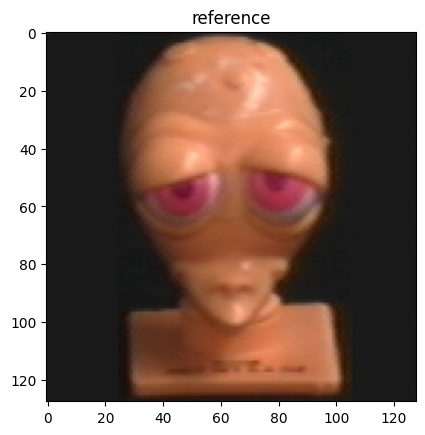

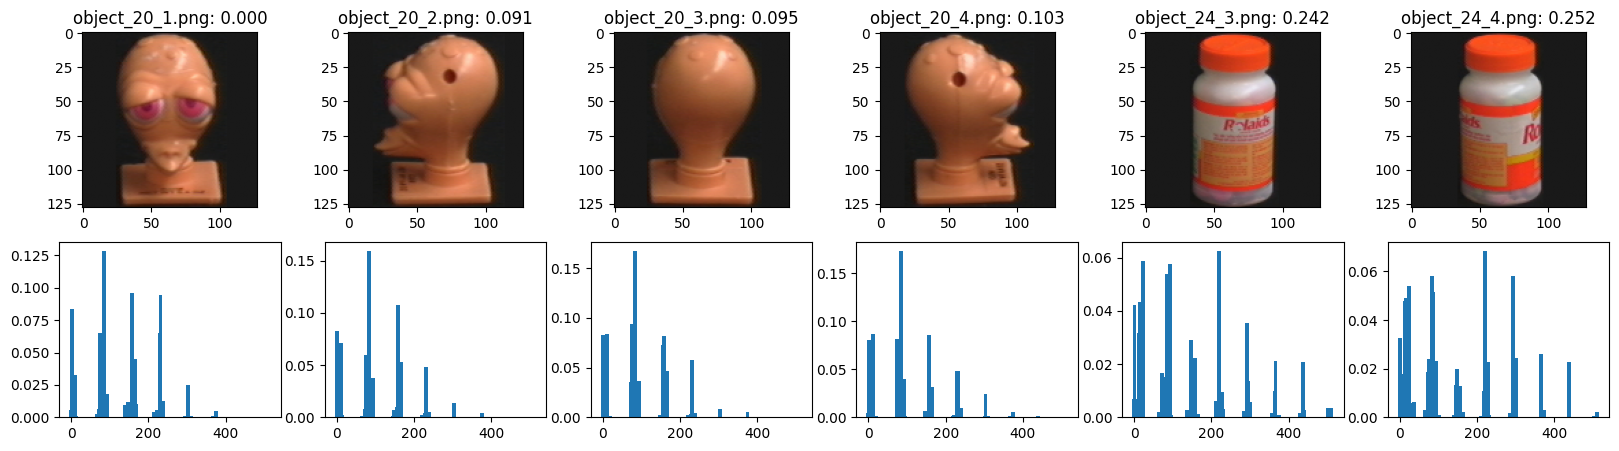

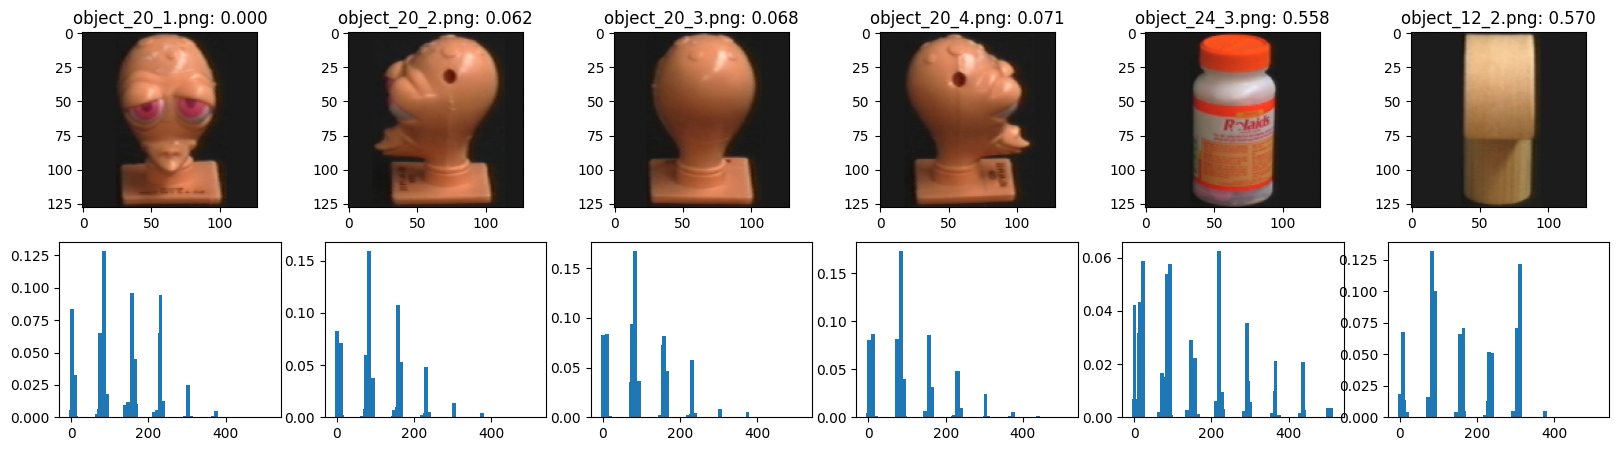

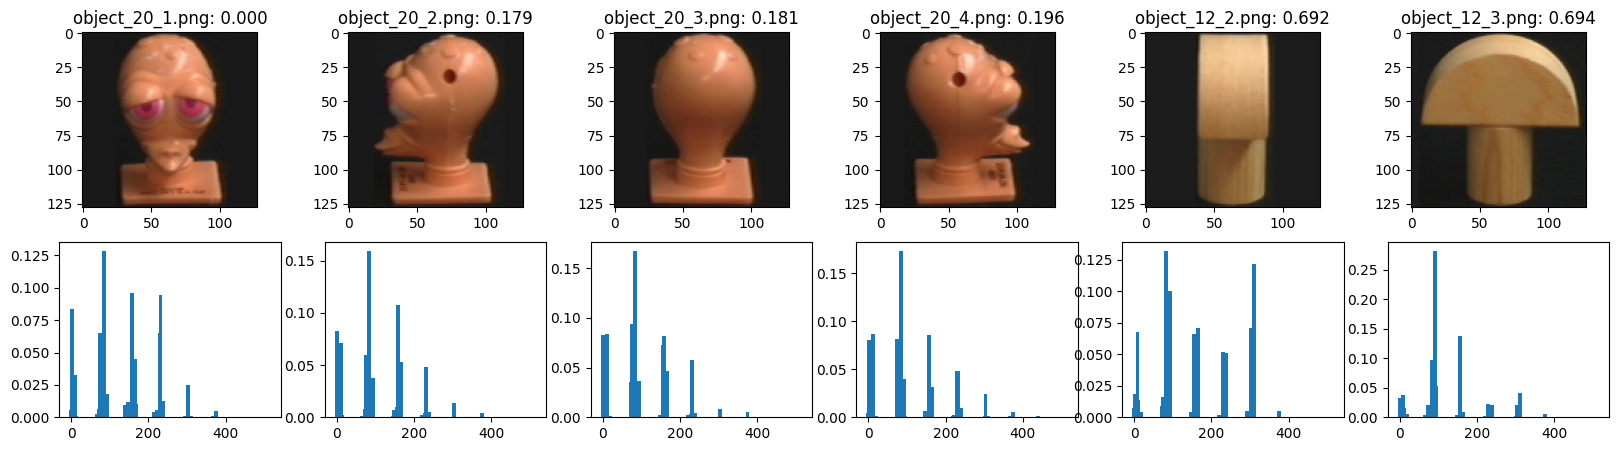

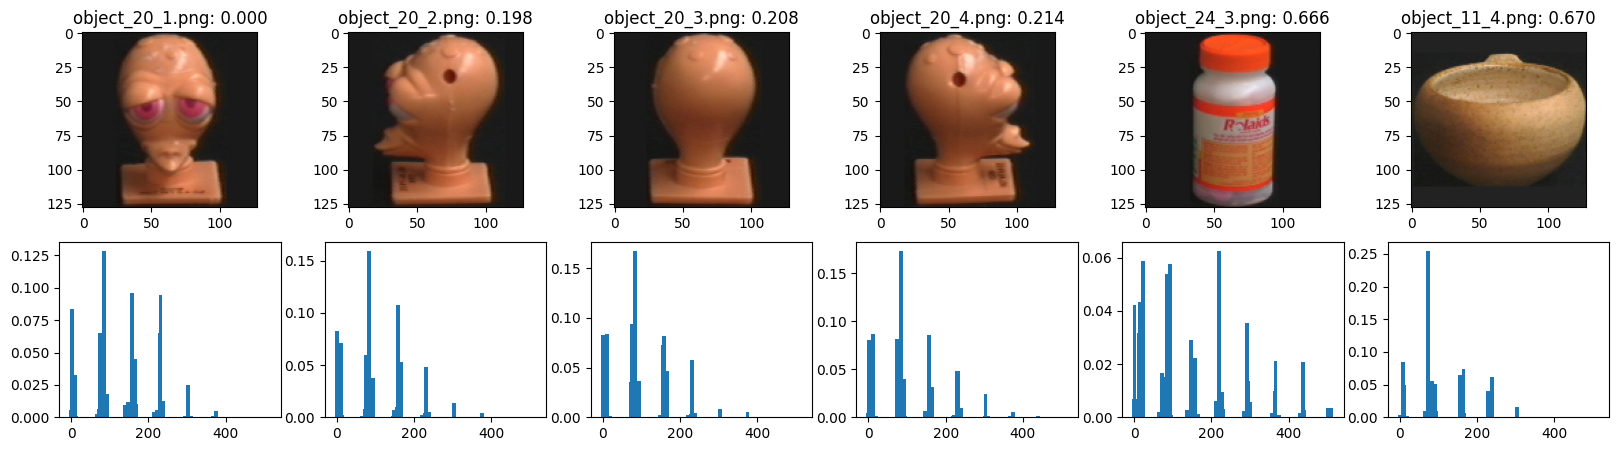

In [28]:
n_bins = 8
lambda_weight = 0.1

ref_img = imread('dataset/object_20_1.png')
ref_hist = myhist3(ref_img, n_bins)

dataset_hists = compute_histograms('dataset', n_bins)

global_weights = compute_global_weights(dataset_hists, lambda_weight)

weighted_ref_hist = apply_weights(ref_hist, global_weights)
weighted_dataset_hists = [(apply_weights(hist, global_weights), img, name) for hist, img, name in dataset_hists]

imshow(ref_img, title="reference")

euc_dist, euc_sort_dist = display_similar(euclidean, weighted_ref_hist, weighted_dataset_hists, n_bins)
chi_dist, chi_sort_dist = display_similar(chi_square, weighted_ref_hist, weighted_dataset_hists, n_bins)
inte_dist, inte_sort_dist = display_similar(intersection, weighted_ref_hist, weighted_dataset_hists, n_bins)
hel_dist, hel_sort_dist = display_similar(hellinger, weighted_ref_hist, weighted_dataset_hists, n_bins)